# TODO:
#### João:
- cena das datas passar horas para tarde/noite/manha/madrugada && dividr dias do mes e mes
- nominal to numeric | NOminal value discretization
- outliers
- noise
- duplicated Records

#### Jorge
- Binning
- feature selection 
- feature scalling
- svn
- training and testing data




In [20]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Lois
from lois import lois_ds_report
%matplotlib inline

In [21]:
testingData = pd.read_csv('data/training_data.csv')

╭─────────────────────────────────────────── Exploratory Data Anlysis ────────────────────────────────────────────╮
│                                                                                                                 │
╰──────────────────────────────────── EDA|simple| Suitable for data scientist ────────────────────────────────────╯

EDA
┗━━ Dataset Shape Analysis
    ┣━━ Dataset head
    ┣━━ General info 
    ┣━━ The target variable
    ┣━━ Number of rows and columns
    ┣━━ The different data types
    ┃   ┣━━ The sum of different variable type
    ┃   ┗━━ Visual representation of different variable type
    ┗━━ Analyze missing value
        ┣━━ The percentage of missing value in each columns
        ┣━━ The missing value counts
        ┗━━ Visual representation of missing value

╭──────────────────────────────────────────── DATASET SHAPE ANALYSIS ─────────────────────────────────────────────╮
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

-------------------- THE HEAD OF YOUR DATASET --------------------

Your dataset is too large ; only the first 8 columns will be display

                                                    The Dataset                                                    
┏━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ city… ┃ magnitude_of_… ┃ delay_in_se… ┃ affected_… ┃ record… ┃ lumin… ┃ avg_tempera… ┃ avg_atm_pre… ┃ avg_humi… ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
└───────┴────────────────┴──────────────┴────────────┴─────────┴────────┴──────────────┴──────────────┴───────────┘

-------------------- SOME GENERAL INFO ABOUT YOUR DATASET --------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


-------------------- THE TARGET VARIABLE OF YOUR DATASET --------------------

╭───────────────────────────────────────╮
│ The Target variable is : 'incidents'  │
╰───────────────────────────────────────╯

-------------------- ROWS AND COLUMNS IN YOUR DATASET --------------------

╭─ Shape output ─╮
│ (5000, 13)     │
╰────────────────╯

╭────────────────────────────────────────────────╮
│ Your dataset contains 5000 Rows and 13 Columns │
╰────────────────────────────────────────────────╯

-------------------- THE DATA TYPES IN YOUR DATASET --------------------

╭─ Data types output ─╮
│ object     7        │
│ float64    5        │
│ int64      1        │
│ dtype: int64        │
╰─────────────────────╯

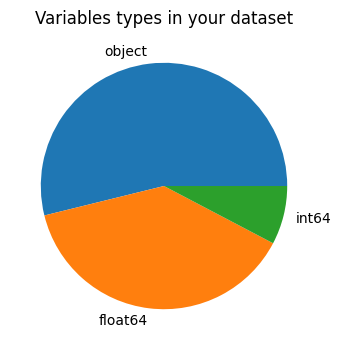

-------------------- MISSING VALUE IN YOUR DATASET --------------------

╭─── Missing value output ────╮
│ city_name             0.000 │
│ magnitude_of_delay    0.000 │
│ delay_in_seconds      0.000 │
│ record_date           0.000 │
│ luminosity            0.000 │
│ avg_temperature       0.000 │
│ avg_atm_pressure      0.000 │
│ avg_humidity          0.000 │
│ avg_wind_speed        0.000 │
│ avg_precipitation     0.000 │
│ avg_rain              0.000 │
│ incidents             0.000 │
│ affected_roads        0.017 │
│ dtype: float64              │
╰─────────────────────────────╯

╭─ Missing value counts output ─╮
│ 0.017     1                   │
│ 0.000    12                   │
│ dtype: int64                  │
╰───────────────────────────────╯

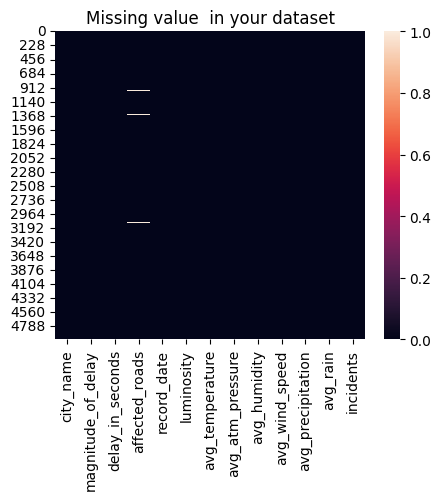

#################### END ####################

In [22]:
lois_ds_report(testingData,target_variable="incidents")

In [23]:
testingData.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [24]:
testingData.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


In [25]:
testingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


### Handle missing values

In [26]:
# collum affected_roles to numeric

def count_roads(affected_roads):
    #check if affected_roads is a float(nan values)
    if isinstance(affected_roads, float) and np.isnan(affected_roads):
        return 0
    return len(affected_roads.split(','))

# count the number of different roads affected
def count_roads(affected_roads):
    #check if affected_roads is a float(nan values)
    if isinstance(affected_roads, float) and np.isnan(affected_roads):
        return 0
    result = []
    return len([result.append(x) for x in affected_roads.split(',') if x not in result] )


testingData['number_affected_roads'] = testingData['affected_roads'].copy().apply(count_roads)
testingData['number_diffetent_affected_roads'] = testingData['affected_roads'].copy().apply(count_roads)

print(testingData.head())

   city_name magnitude_of_delay  delay_in_seconds  \
0  Guimaraes          UNDEFINED                 0   
1  Guimaraes          UNDEFINED               385   
2  Guimaraes          UNDEFINED                69   
3  Guimaraes              MAJOR              2297   
4  Guimaraes          UNDEFINED                 0   

                                      affected_roads       record_date  \
0                                                  ,  2021-03-15 23:00   
1                                              N101,  2021-12-25 18:00   
2                                                  ,  2021-03-12 15:00   
3  N101,R206,N105,N101,N101,N101,N101,N101,N101,N...  2021-09-29 09:00   
4                          N101,N101,N101,N101,N101,  2021-06-13 11:00   

  luminosity  avg_temperature  avg_atm_pressure  avg_humidity  avg_wind_speed  \
0       DARK             12.0            1013.0          70.0             1.0   
1       DARK             12.0            1007.0          91.0             

---

In [27]:
#testing if exists null values
testingData.isna().any()

city_name                          False
magnitude_of_delay                 False
delay_in_seconds                   False
affected_roads                      True
record_date                        False
luminosity                         False
avg_temperature                    False
avg_atm_pressure                   False
avg_humidity                       False
avg_wind_speed                     False
avg_precipitation                  False
avg_rain                           False
incidents                          False
number_affected_roads              False
number_diffetent_affected_roads    False
dtype: bool

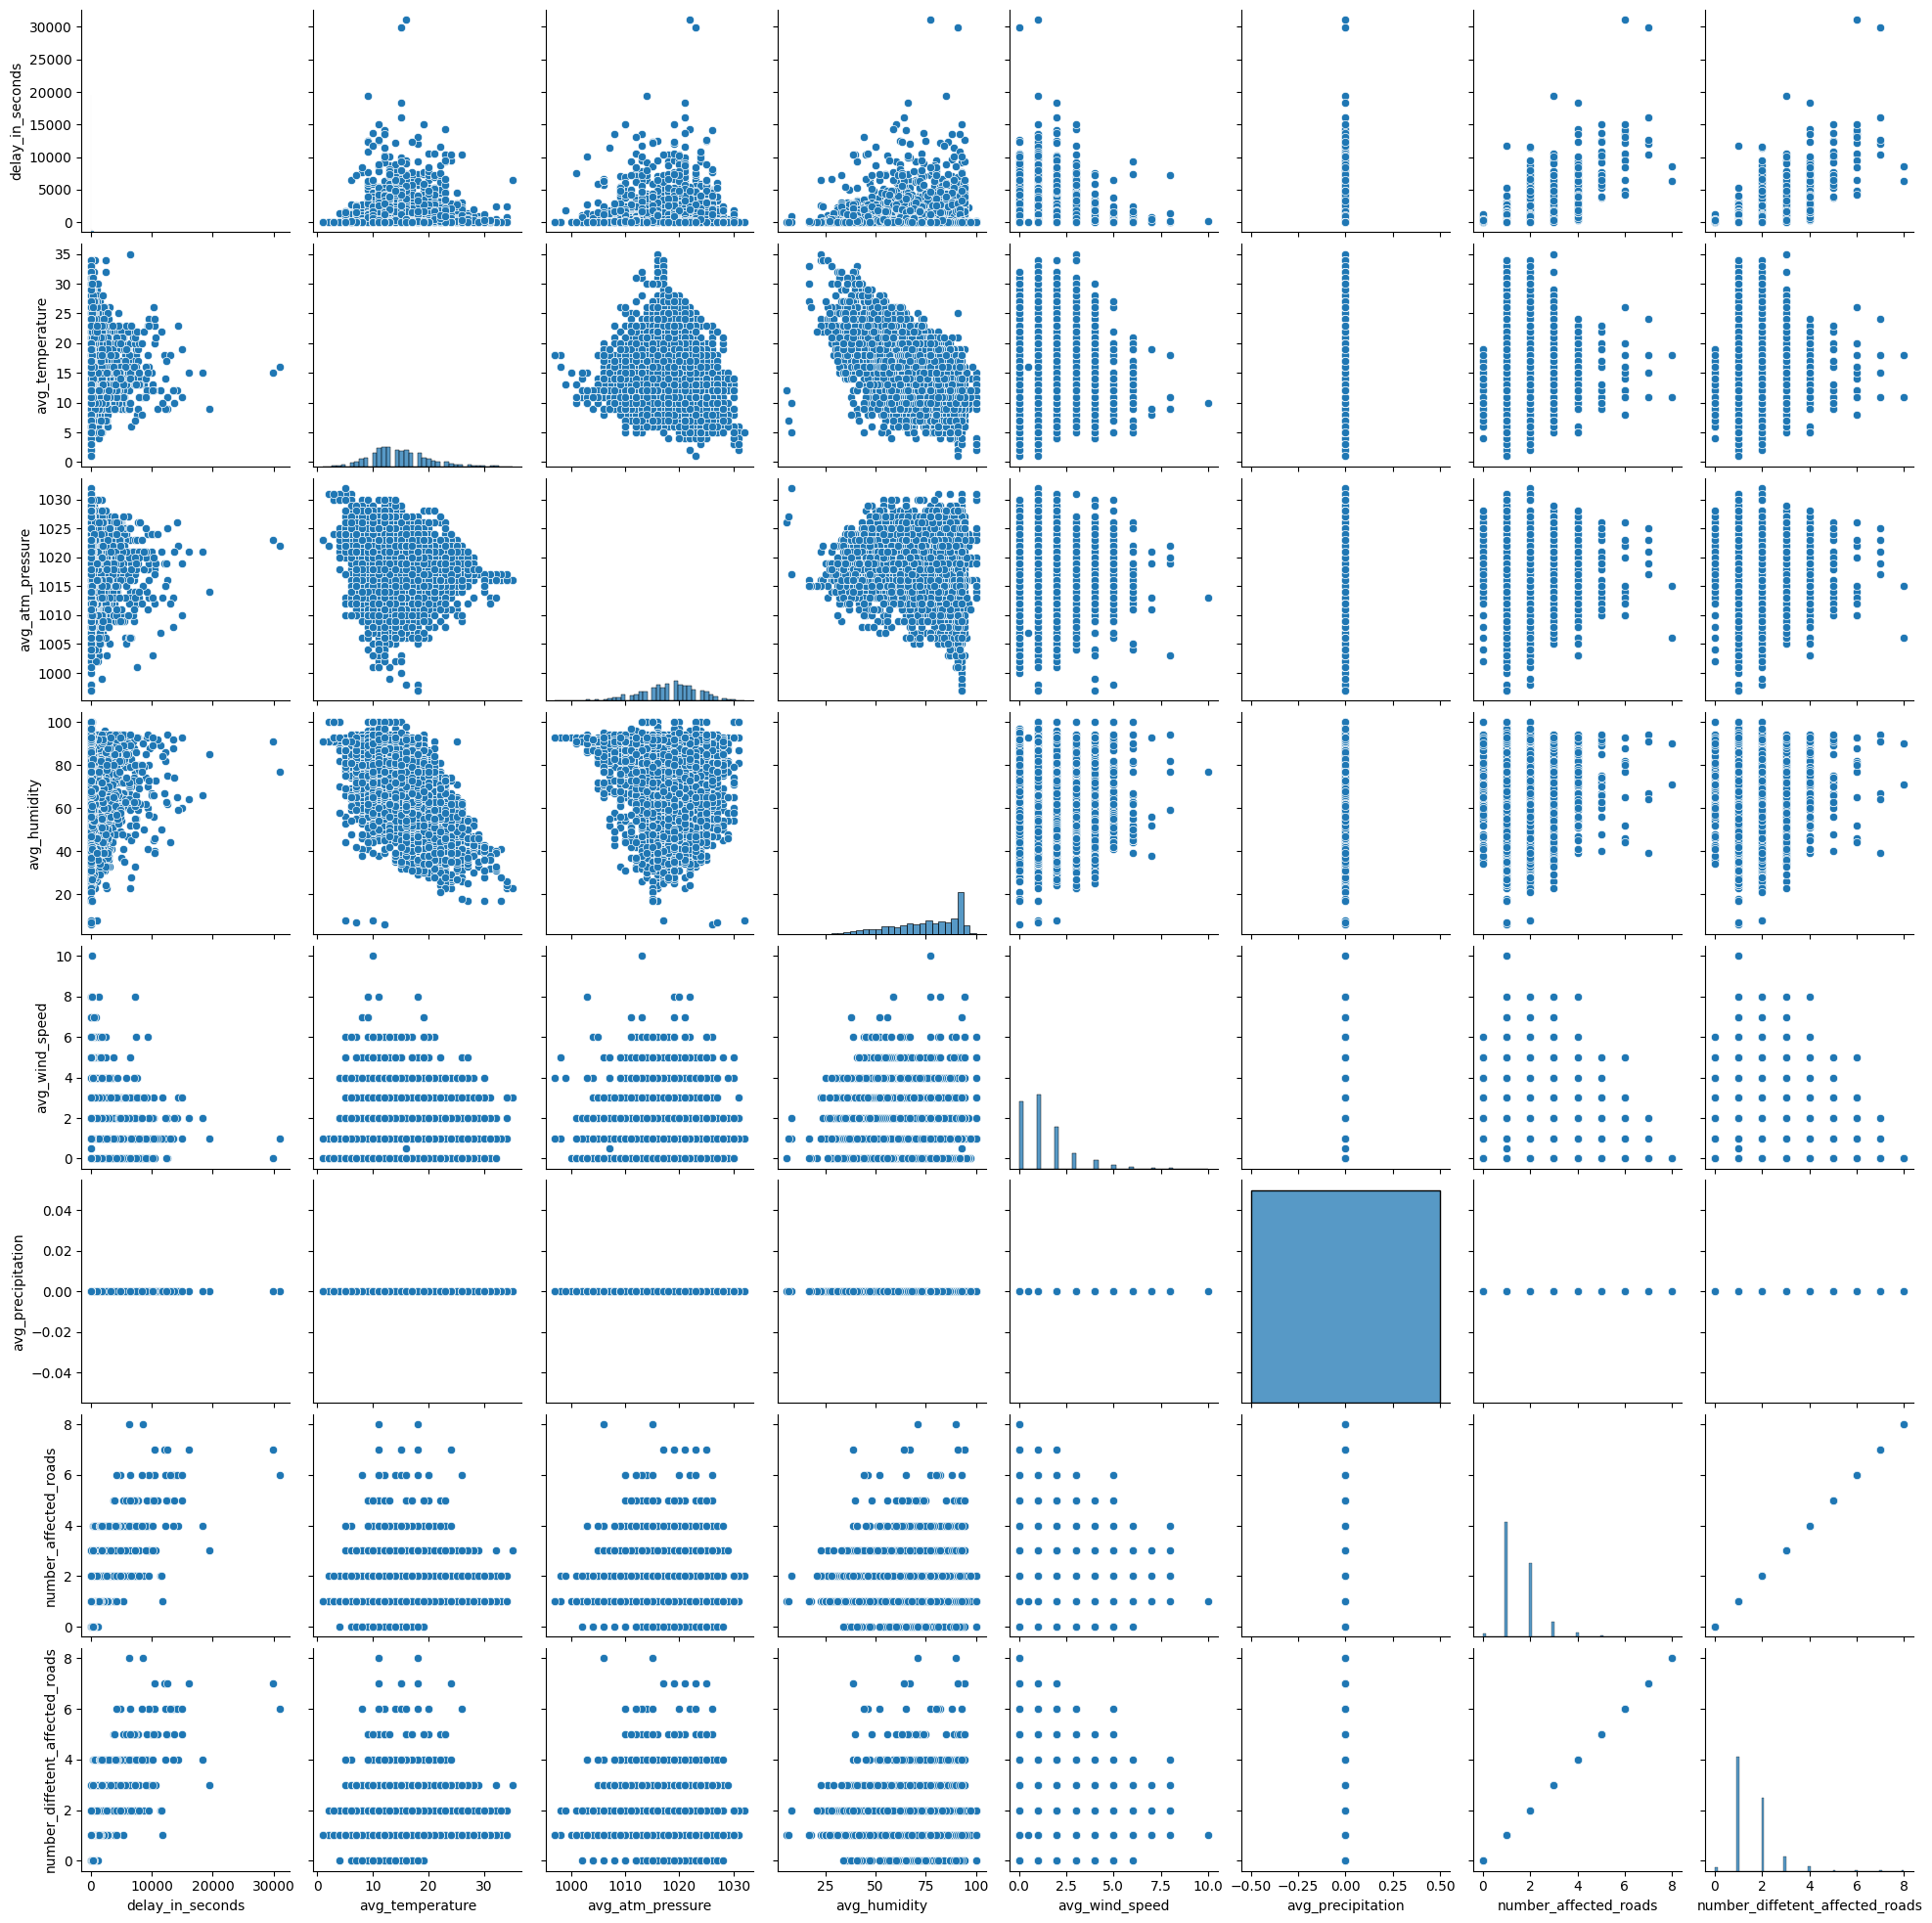

In [28]:
sns.pairplot(testingData)

In [29]:
testingData.profile_report(minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
#Remove city_name column, only guimaraes is present
testingData.drop('city_name',axis=1,inplace=True)


# Turn values to Numeric

###  TURN incidents to numeric

In [31]:

dict_incidents = {'None': 0,'Low':1,'Medium':2,'High':3, 'Very_High':4}
testingData['incidents'] = testingData['incidents'].map(dict_incidents)

<AxesSubplot:>

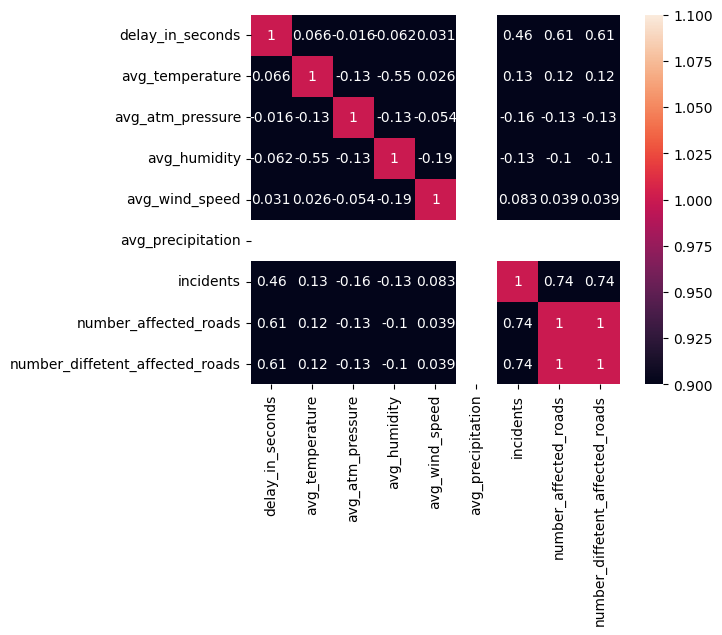

In [32]:
corr_matrix = testingData.corr(numeric_only=True)
sns.heatmap(corr_matrix,vmin=1,vmax=1,square=True, annot=True)

## Models

# Regressão Logística.

Aprendizagem supervisionada



Maquinas de Vectores de Suporte (SVM); 

In [33]:
""" Save results to a file. """
def saveResults ( results, path ):
    file = open(path, 'w')
    file.write ("RowId,Incidents\n")
    i = 1
    for result in results :
        file.write (str(i) + "," + result + "\n")
        i += 1

In [34]:
# TODO REmover ??

from sklearn import preprocessing, tree, metrics, model_selection, linear_model

trainingData = pd.read_csv('data/training_data.csv')

testingData = pd.read_csv('data/test_data.csv')
testingDataLR = testingData.drop(['city_name', 'magnitude_of_delay', 'affected_roads', 'record_date', 'luminosity', 'avg_rain'], axis=1) # TODO REMOVER

tData = trainingData.copy()
x_tData = tData.drop(['incidents'], axis=1)
y_tData = tData['incidents'] 
x_tDataLR = x_tData.drop(['city_name', 'magnitude_of_delay', 'affected_roads', 'record_date', 'luminosity', 'avg_rain'], axis=1) # TODO REMOVER

In [35]:
logmodel = linear_model.LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
logmodel.fit(x_tDataLR,y_tData)



resultsLR = logmodel.predict(testingDataLR)
saveResults(resultsLR, 'results/logisticRegression.csv')

# Árvores de Decisão e Classificação

In [36]:
dtc = tree.DecisionTreeClassifier(random_state=2022, criterion="gini", max_depth=10)
dtc.fit(x_tDataLR,y_tData)
dtc.predict(testingDataLR)
saveResults(resultsLR, 'results/classificationDecisionTree.csv')